In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
url = 'https://github.com/mattharrison/datasets'+\
    '/raw/master/data/alta-noaa-1980-2019.csv'

In [4]:
alta_df = pd.read_csv(url)

In [5]:
dates = pd.to_datetime(alta_df.DATE)

In [6]:
snow = (alta_df
       .SNOW
       .rename(dates)
)

In [7]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<Axes: ylabel='Frequency'>

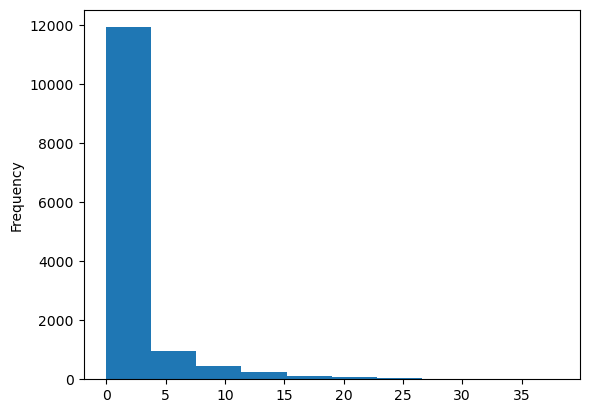

In [8]:
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

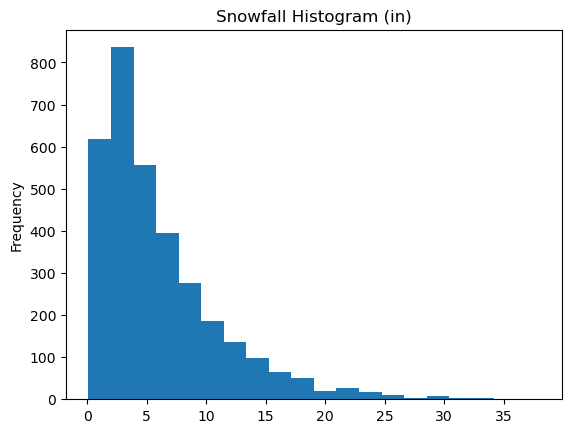

In [9]:
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: >

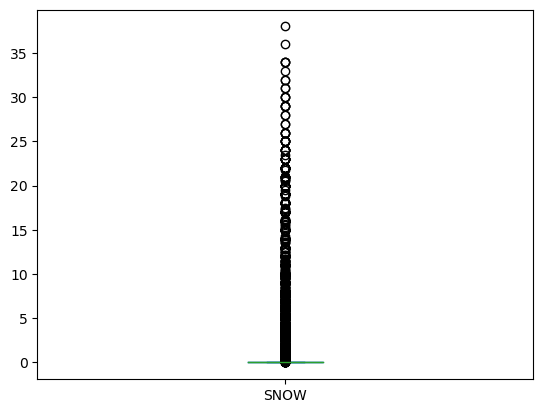

In [10]:
snow.plot.box()

<Axes: >

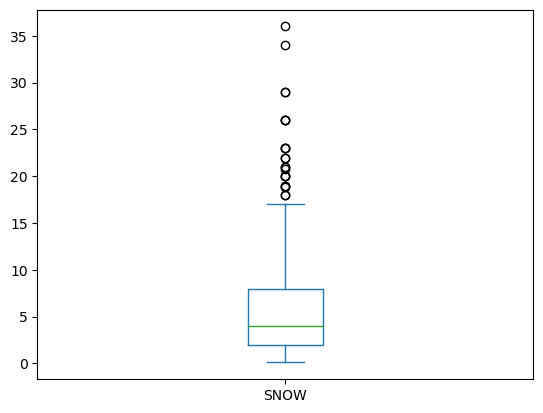

In [11]:
(snow
    [lambda s:(s.index.month == 1) & (s>0)]
    .plot.box()
)

<Axes: ylabel='Density'>

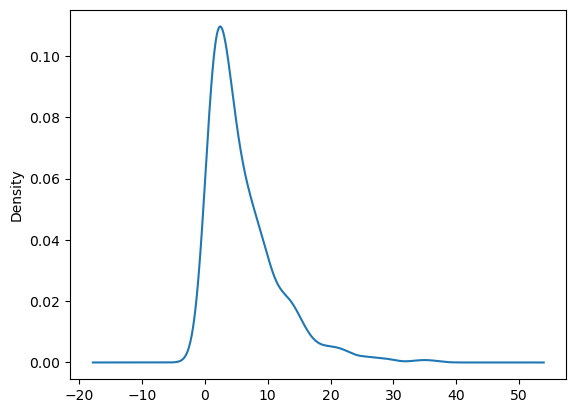

In [12]:
(snow
    [lambda s:(s.index.month == 1) & (s>0)]
    .plot.kde()
)

<Axes: >

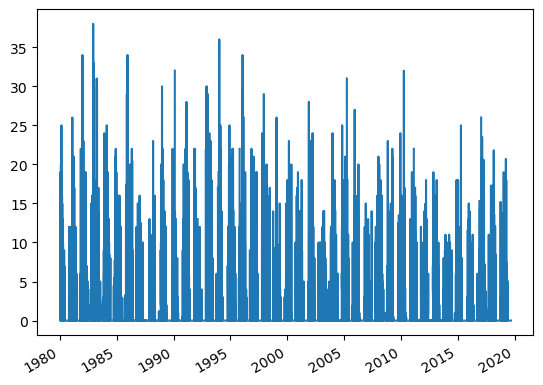

In [13]:
snow.plot.line()

<Axes: >

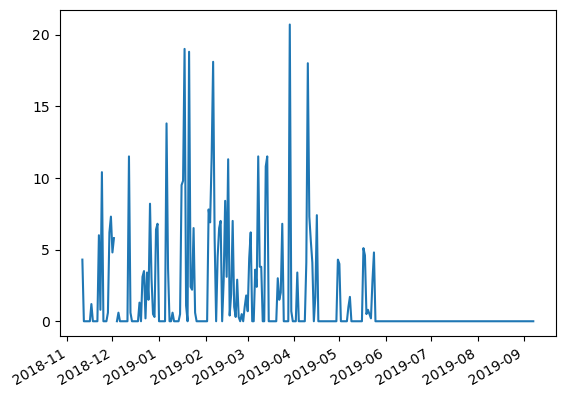

In [14]:
(snow
    .iloc[-300:]
    .plot.line()
)

<Axes: >

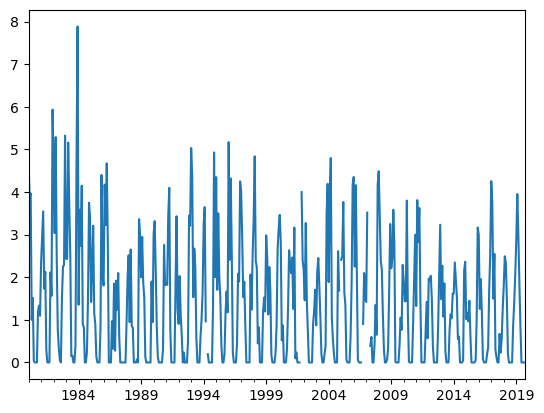

In [15]:
(snow
    .resample('M')
    .mean()
    .plot.line()
)

<Axes: >

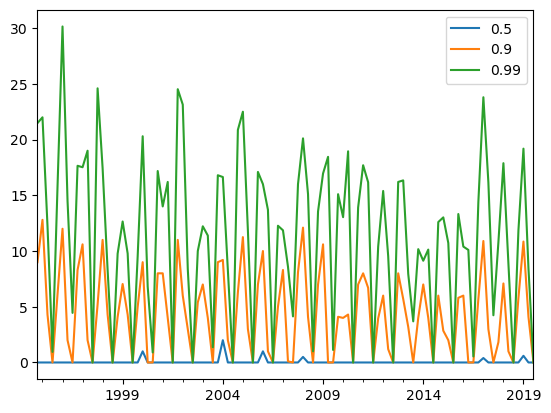

In [16]:
(snow
    .resample('Q')
    .quantile([.5, .9, .99])
    .unstack()
    .iloc[-100:]
    .plot.line()
)

In [17]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
)

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

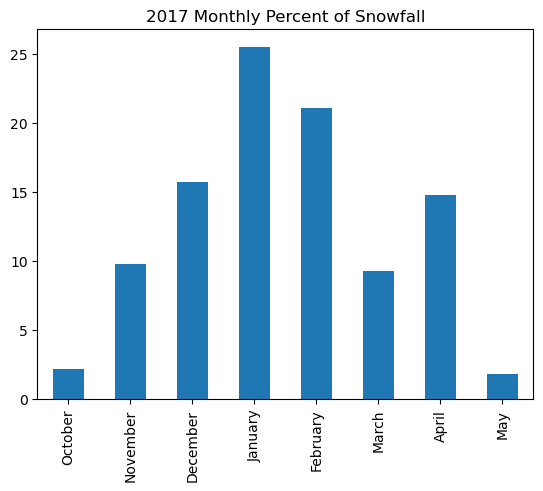

In [18]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.bar(title='2017 Monthly Percent of Snowfall')
)

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

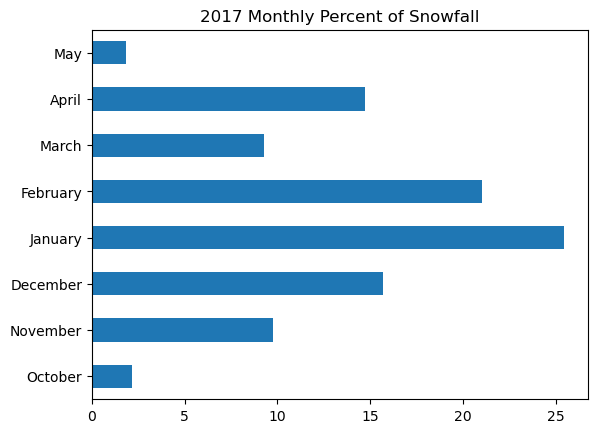

In [19]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.barh(title='2017 Monthly Percent of Snowfall')
)

In [20]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      'vehicles.csv.zip'
df = pd.read_csv(url)    # doctest: +SKIP
make = df.make

/var/folders/0m/djy5jf494nl4fkspl_602jb00000gn/T/ipykernel_1056/4185886598.py:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)    # doctest: +SKIP


In [21]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

<Axes: >

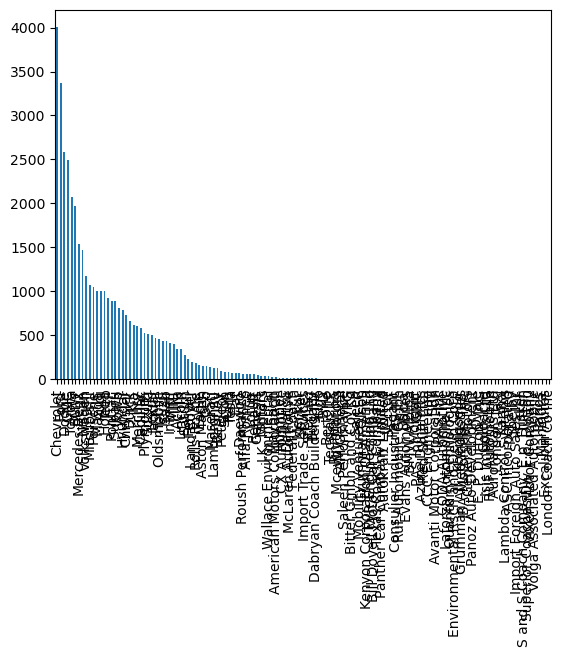

In [22]:
(make
    .value_counts()
    .plot.bar()
)

In [23]:
top10 = make.value_counts().index[:10]

<Axes: >

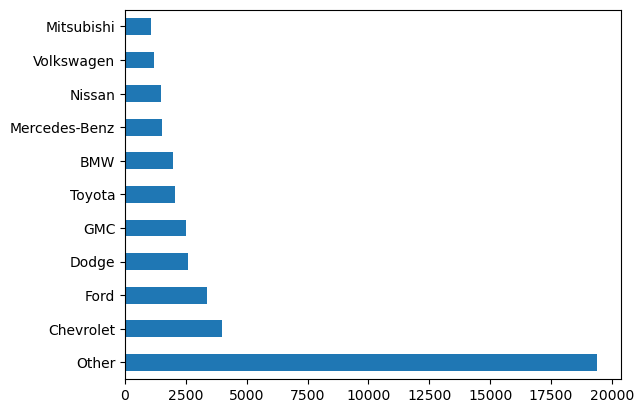

In [24]:
(make
    .where(make.isin(top10), 'Other')
    .value_counts()
    .plot.barh()
)

<Axes: title={'center': '2017 Monthly Percent of SNowfall'}, ylabel='SNOW'>

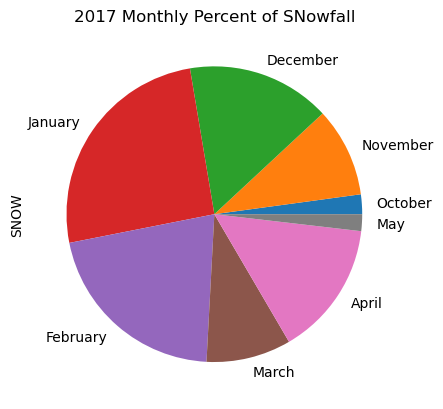

In [25]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.pie(title='2017 Monthly Percent of SNowfall'))